In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tabulate import tabulate





In [7]:
# Load the data from CSV
data = pd.read_csv('dateproducts_2.csv')



In [8]:
# Convert 'order_date' to datetime using the correct format "dd/mm/yyyy"
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')

In [9]:
data.head()

,product_id,order_date,quantity
0,13b52198-282b47cc,2020-02-01,1
1,13e6c8b5-4cf1954c,2020-02-01,1
2,14a417db-2493ccbe,2020-02-01,1
3,14a417db-2493ccbe,2020-02-01,2
4,15e7b5d2-0dddbf19,2020-02-01,3


In [10]:
# Preprocess the data
data['order_date'] = pd.to_datetime(data['order_date'])



In [11]:
# Prepare the time series data
time_series = data.groupby('order_date')['quantity'].sum()



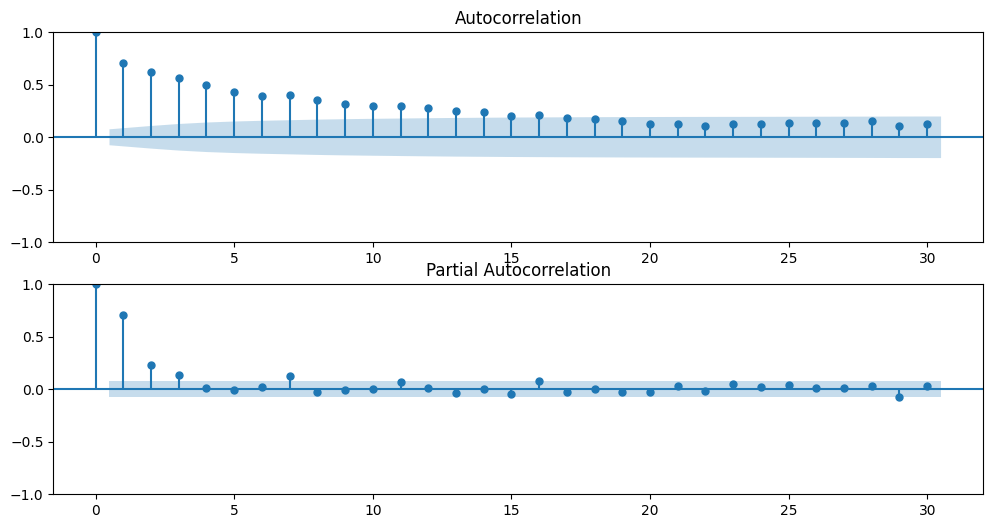

In [12]:
# Plot the ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(time_series, lags=30, ax=plt.gca(), alpha=0.05)
plt.subplot(212)
plot_pacf(time_series, lags=30, ax=plt.gca(), alpha=0.05)
plt.show()

In [13]:
# Create and fit the ARIMA model
model = ARIMA(time_series, order=(1, 0, 0))
model_fit = model.fit()



C:\Users\Milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
# Forecast the quantities for the next month
forecast = model_fit.get_forecast(steps=30)
forecast_values = forecast.predicted_mean



In [15]:
# Get the start and end dates for the forecasted period
start_date = time_series.index.max() + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(days=29)



In [16]:
# Print the total quantity for the next month
total_quantity = int(forecast_values.sum())
print("Total quantity for the next month:", total_quantity)



Total quantity for the next month: 21909


In [17]:
# Create the dates for the forecasted period
forecast_dates = pd.date_range(start=start_date, end=end_date)



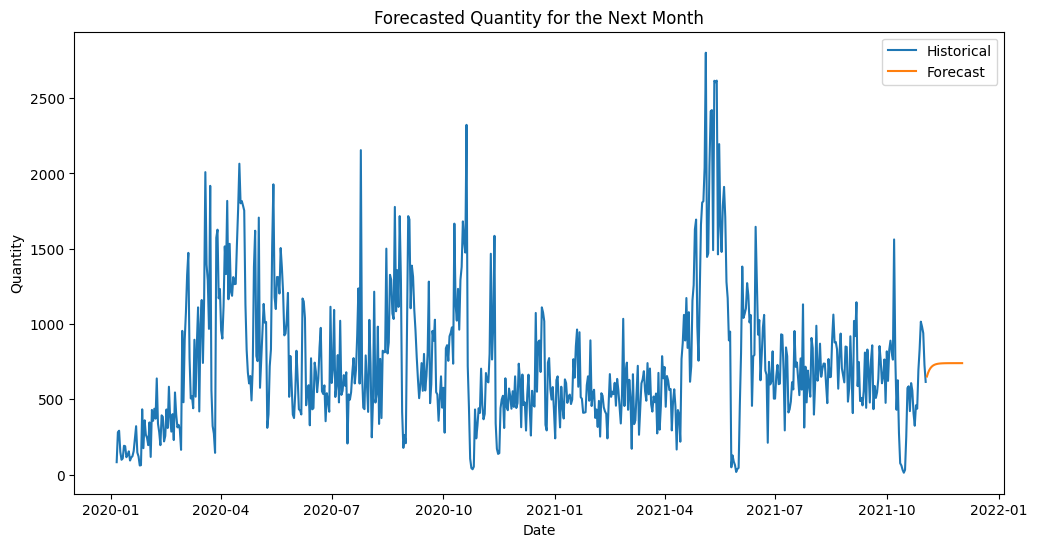

Total quantity for the next month: 21909


In [18]:
# Plot the forecasted quantities
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, label='Historical')
plt.plot(forecast_dates, forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecasted Quantity for the Next Month')
plt.legend()
plt.show()
total_quantity = int(forecast_values.sum())
print("Total quantity for the next month:", total_quantity)






In [19]:
# Create the dates for the forecasted period
forecast_dates = pd.date_range(start=start_date, end=end_date)



In [20]:
# Create a dataframe for the forecasted data
forecast_df = pd.DataFrame({'date': forecast_dates, 'quantity': forecast_values})



In [21]:
# Merge the forecasted data with the original data
merged_data = pd.merge(data, forecast_df, left_on='order_date', right_on='date', how='outer')



In [22]:
# Group the merged data by product ID and sum the quantities
next_month_quantities = merged_data.groupby('product_id')['quantity_x'].sum().reset_index()



In [23]:
# Group the merged data by product ID and sum the quantities
next_month_quantities = merged_data.groupby('product_id')['quantity_x'].sum().reset_index()

# Sort the next_month_quantities DataFrame in descending order based on the quantity
sorted_next_month_quantities = next_month_quantities.sort_values(by='quantity_x', ascending=False)

# Print the sorted list
for row in sorted_next_month_quantities.itertuples(index=False):
    print("Product ID:", row[0])
    print("Quantity:", int(row[1]))
    print()
    


Product ID: 7ad41de2-bb1053b7
Quantity: 12747

Product ID: 57461436-c8941730
Quantity: 11303

Product ID: 3d82cfe9-92ab1e78
Quantity: 7203

Product ID: b2173f97-bae900c0
Quantity: 5899

Product ID: fa12e293-40941901
Quantity: 5059

Product ID: 226e0f5e-8b946a36
Quantity: 4812

Product ID: 65716d5f-ea0abeef
Quantity: 4601

Product ID: 132dbfb2-98b798a9
Quantity: 4332

Product ID: 68e36ae4-6ad4bcc7
Quantity: 4130

Product ID: 227b7c20-18e64942
Quantity: 3847

Product ID: 15e7b5d2-0dddbf19
Quantity: 3614

Product ID: 303fa913-8989e247
Quantity: 3467

Product ID: 27a12791-e0bdf242
Quantity: 3466

Product ID: 3ace79bc-5b820746
Quantity: 2841

Product ID: 7820c499-2e59a7eb
Quantity: 2612

Product ID: 5d1b8eca-da253586
Quantity: 2500

Product ID: 5b8f015d-716c4f89
Quantity: 2498

Product ID: 6232f9b6-eb33ba10
Quantity: 2461

Product ID: 6da036b5-9f17c1bf
Quantity: 2456

Product ID: 2cb4d114-ef2ceabd
Quantity: 2324

Product ID: 76875ebd-11ea607d
Quantity: 2310

Product ID: 634dcf4f-8ba0a170
Qu

In [24]:

# Create a list of lists to store the data for tabulate
ascending_table_data = []
descending_table_data = []

for row in sorted_next_month_quantities.itertuples(index=False):
    product_id = row[0]
    quantity = int(row[1])

    # For ascending order
    ascending_table_data.append([product_id, quantity])

    # For descending order
    descending_table_data.insert(0, [product_id, quantity])

# Define the table headers
headers = ["Product ID", "Quantity"]

# Print the tabular data for ascending order
print("Descending Order:")
print(tabulate(ascending_table_data, headers=headers, tablefmt="grid"))




Descending Order:
+-------------------+------------+
| Product ID        |   Quantity |
+===================+============+
| 7ad41de2-bb1053b7 |      12747 |
+-------------------+------------+
| 57461436-c8941730 |      11303 |
+-------------------+------------+
| 3d82cfe9-92ab1e78 |       7203 |
+-------------------+------------+
| b2173f97-bae900c0 |       5899 |
+-------------------+------------+
| fa12e293-40941901 |       5059 |
+-------------------+------------+
| 226e0f5e-8b946a36 |       4812 |
+-------------------+------------+
| 65716d5f-ea0abeef |       4601 |
+-------------------+------------+
| 132dbfb2-98b798a9 |       4332 |
+-------------------+------------+
| 68e36ae4-6ad4bcc7 |       4130 |
+-------------------+------------+
| 227b7c20-18e64942 |       3847 |
+-------------------+------------+
| 15e7b5d2-0dddbf19 |       3614 |
+-------------------+------------+
| 303fa913-8989e247 |       3467 |
+-------------------+------------+
| 27a12791-e0bdf242 |       3466 |
+-

In [25]:
# Print the tabular data for descending order
print("Ascending Order:")
print(tabulate(descending_table_data, headers=headers, tablefmt="grid"))


Ascending Order:
+-------------------+------------+
| Product ID        |   Quantity |
+===================+============+
| 100f3226-4aa0c414 |          1 |
+-------------------+------------+
| 49c3e38d-a80647de |          1 |
+-------------------+------------+
| 7b3036fc-afa6f11e |          1 |
+-------------------+------------+
| 49c7d2f4-066b35b3 |          1 |
+-------------------+------------+
| 49c91d33-52bd5cdd |          1 |
+-------------------+------------+
| 49e82b2e-dda47efb |          1 |
+-------------------+------------+
| 49f174f8-b1e05489 |          1 |
+-------------------+------------+
| 7b0524a5-7bbec5f6 |          1 |
+-------------------+------------+
| 49f3d295-e1dddf42 |          1 |
+-------------------+------------+
| 49f8456e-76572de9 |          1 |
+-------------------+------------+
| 49ffecc1-ab89d77c |          1 |
+-------------------+------------+
| 4a36b868-65b30542 |          1 |
+-------------------+------------+
| 4aca0e53-f24c85d7 |          1 |
+--